In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder , LabelEncoder
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.compose import ColumnTransformer
from prettytable import PrettyTable

In [ ]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=FutureWarning, message="`sparse` was renamed to `sparse_output`")
warnings.simplefilter("ignore", category=UndefinedMetricWarning)

In [ ]:
data = pd.read_csv("/Customer-Churn-Records.csv")

df = pd.DataFrame(data)

df = df.drop(['RowNumber', 'Surname'], axis=1)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# CONVERTING CATEGORICAL VALUES TO NUMERICAL

In [ ]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Geography'] = encoder.fit_transform(df['Geography'])
df['Card Type'] = encoder.fit_transform(df['Card Type'])

# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   CreditScore         10000 non-null  int64  
 2   Geography           10000 non-null  int64  
 3   Gender              10000 non-null  int64  
 4   Age                 10000 non-null  int64  
 5   Tenure              10000 non-null  int64  
 6   Balance             10000 non-null  float64
 7   NumOfProducts       10000 non-null  int64  
 8   HasCrCard           10000 non-null  int64  
 9   IsActiveMember      10000 non-null  int64  
 10  EstimatedSalary     10000 non-null  float64
 11  Exited              10000 non-null  int64  
 12  Complain            10000 non-null  int64  
 13  Satisfaction Score  10000 non-null  int64  
 14  Card Type           10000 non-null  int64  
 15  Point Earned        10000 non-null  int64  
dtypes: fl

In [ ]:

print(df.columns)

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score',
       'Card Type', 'Point Earned'],
      dtype='object')


In [ ]:
df.duplicated(keep=False).sum()

0

In [ ]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425


In [ ]:
df.describe()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,1.498000,606.515100
std,7.193619e+04,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,1.118356,225.924839
min,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,0.000000,119.000000
25%,1.562853e+07,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,0.000000,410.000000
50%,1.569074e+07,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,1.000000,605.000000
75%,1.575323e+07,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,2.000000,801.000000
max,1.581569e+07,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,3.000000,1000.000000


In [ ]:
df.isnull().sum()

CustomerId            0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

# CORRELATION

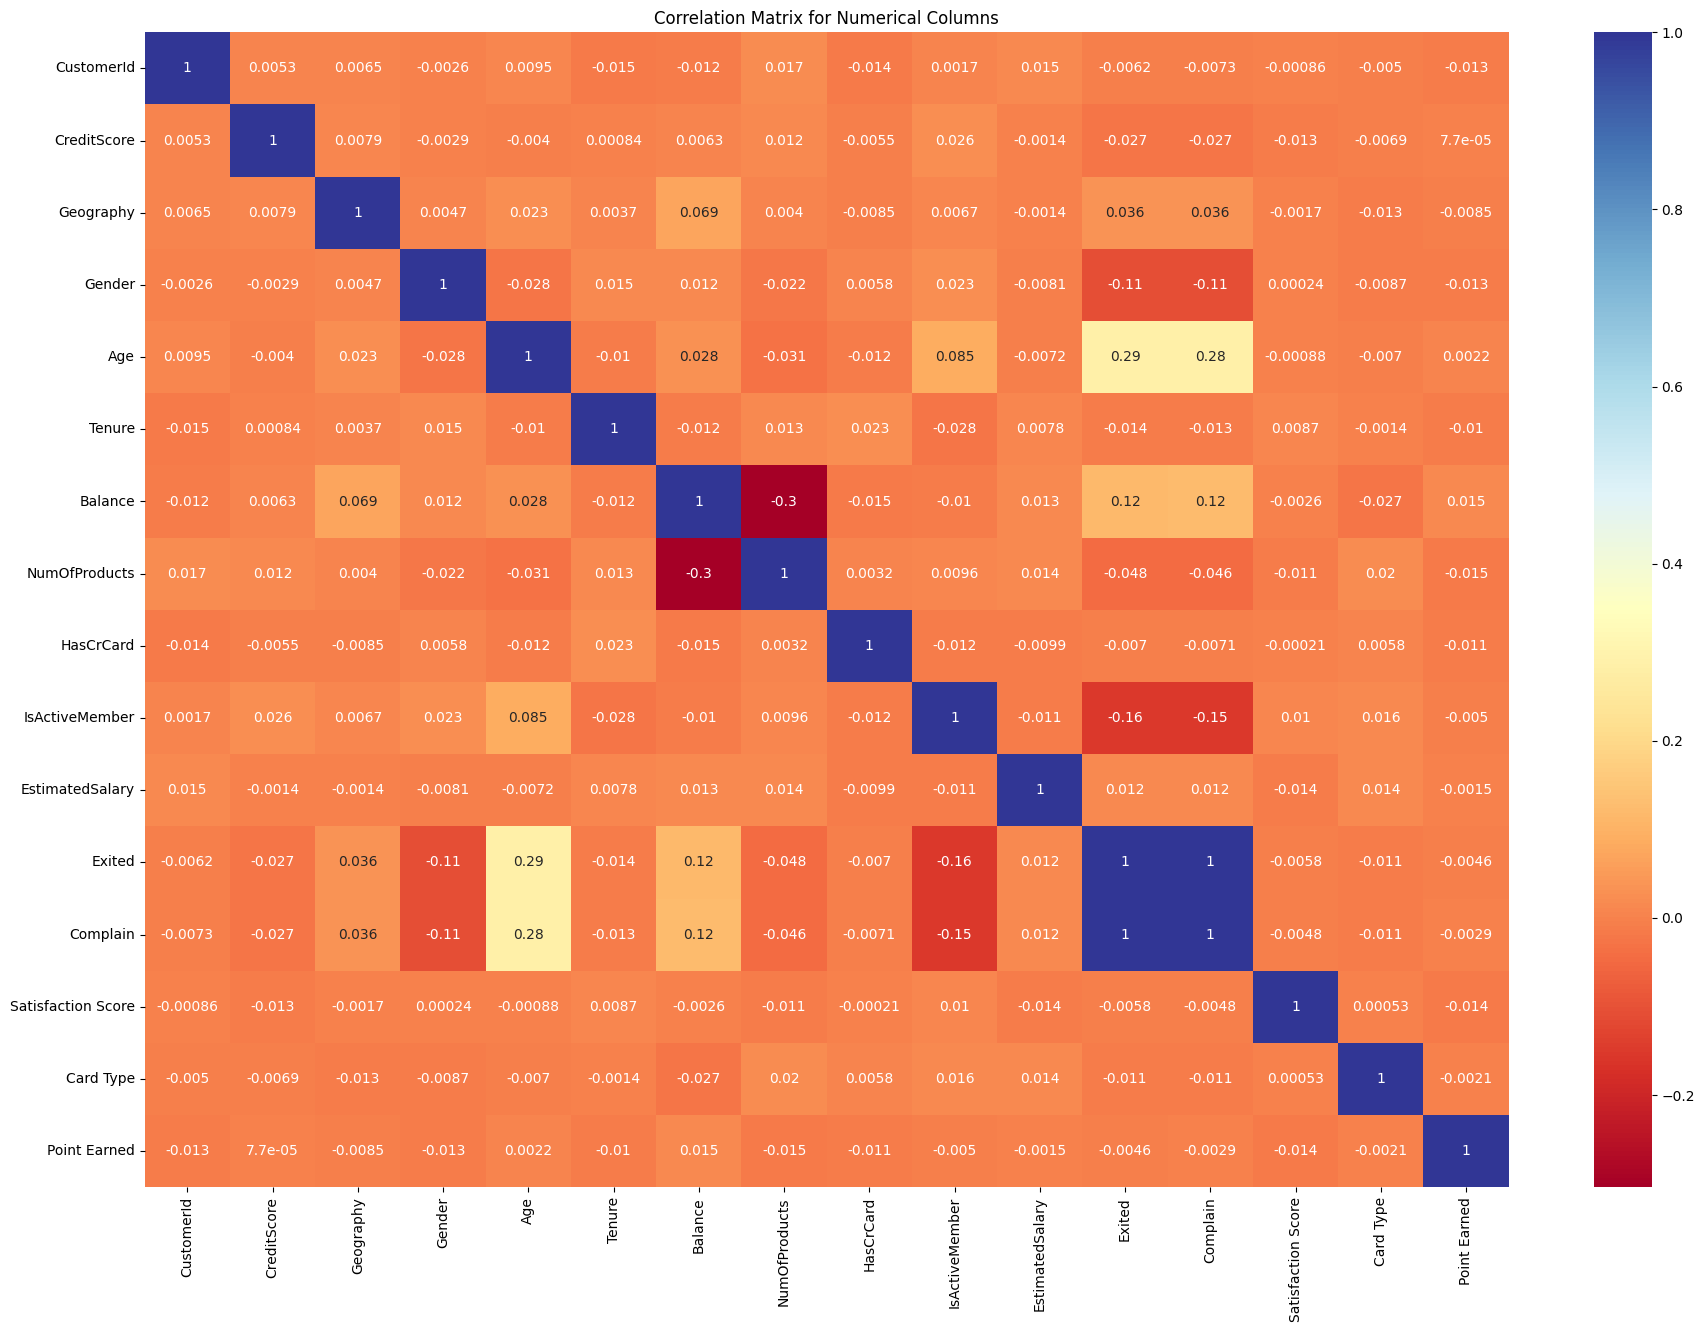

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df_numerical = df[numerical_columns]

correlation_matrix = df_numerical.corr()

plt.subplots(figsize=(22, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

# OUTLIER ANALYSIS

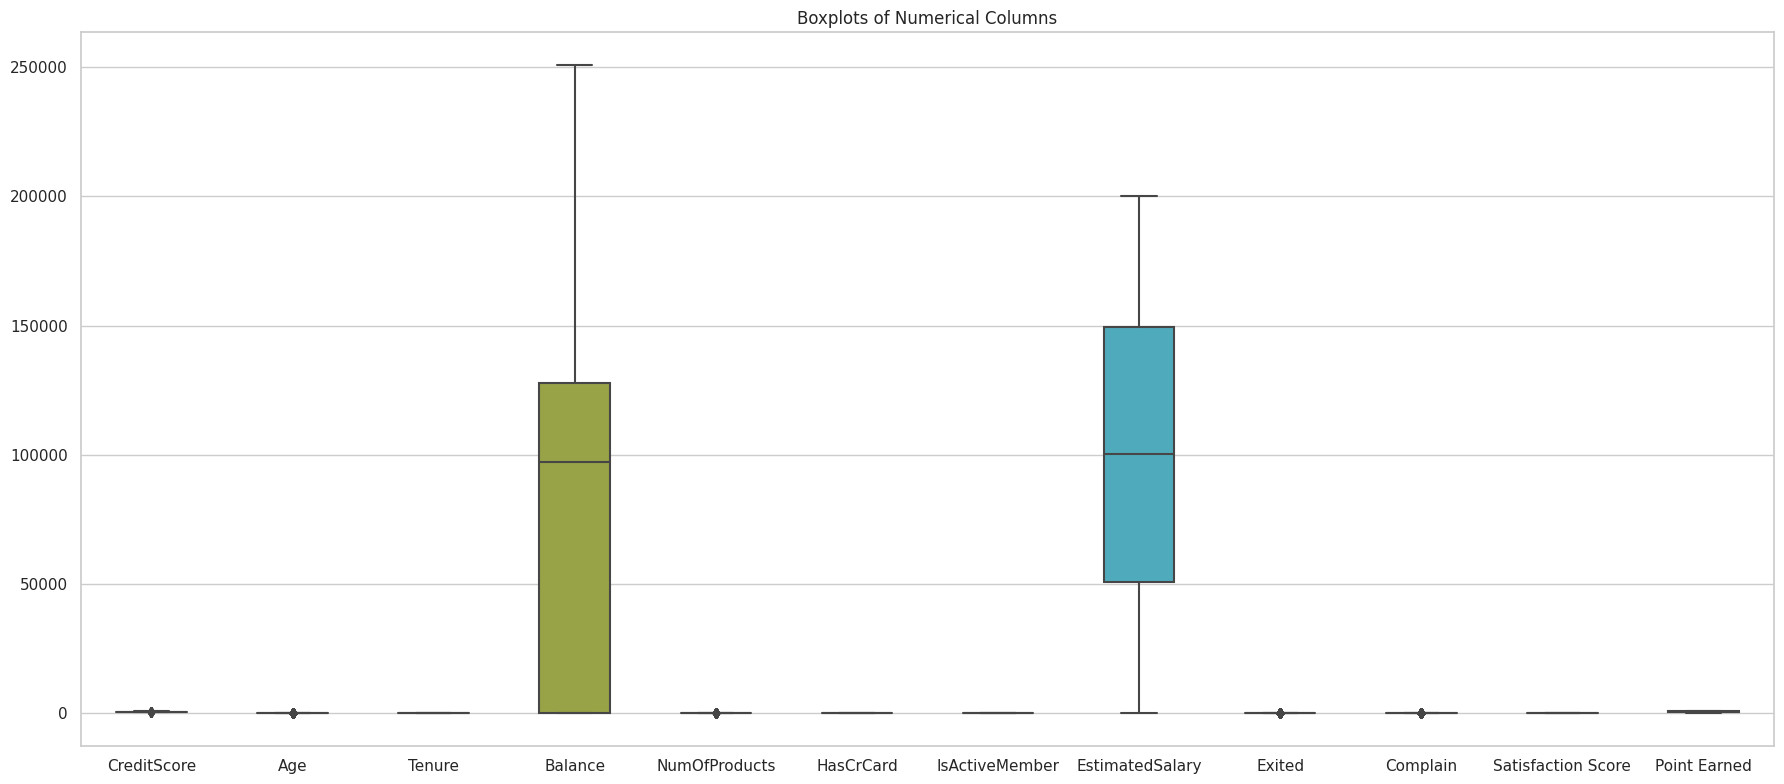

In [ ]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain', 'Satisfaction Score', 'Point Earned']

plt.figure(figsize=(18,8))
sns.set(style="whitegrid")

plt.subplot(1, 1, 1)

sns.boxplot(data=df[numerical_columns], width=0.5)
plt.title('Boxplots of Numerical Columns')

plt.tight_layout()
plt.show()

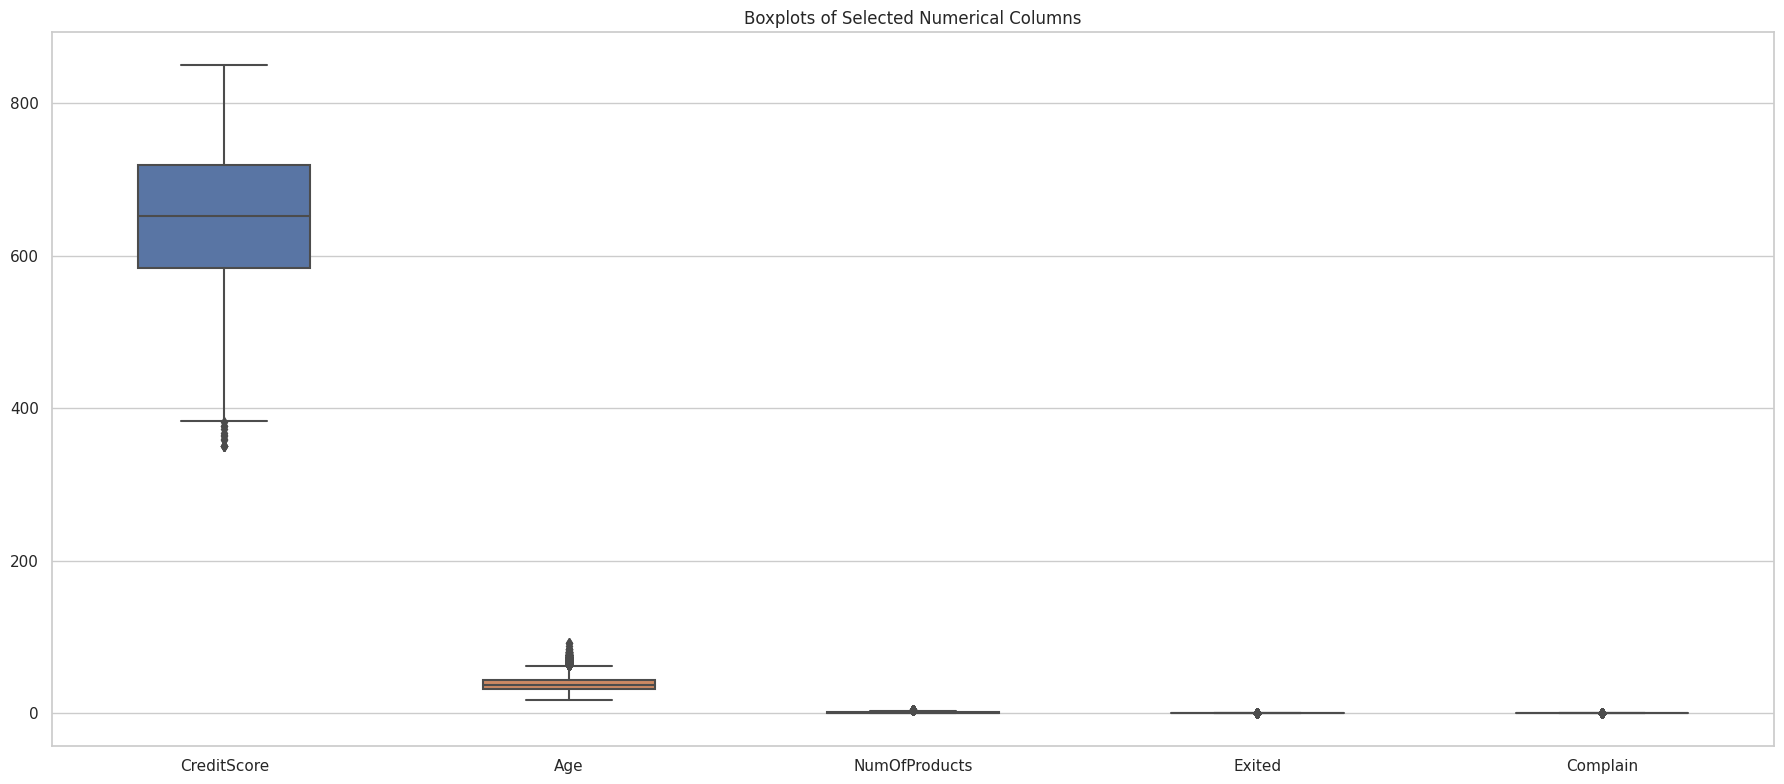

In [ ]:
selected_columns = ['CreditScore', 'Age', 'NumOfProducts', 'Exited', 'Complain']

plt.figure(figsize=(18, 8))
sns.set(style="whitegrid")

plt.subplot(1, 1, 1)

sns.boxplot(data=df[selected_columns], width=0.5)
plt.title('Boxplots of Selected Numerical Columns')

plt.tight_layout()
plt.show()

# AFTER HANDLING OUTLIERS

<ipython-input-20-a8ba7adcb720>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data_imputed
<ipython-input-20-a8ba7adcb720>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data_imputed


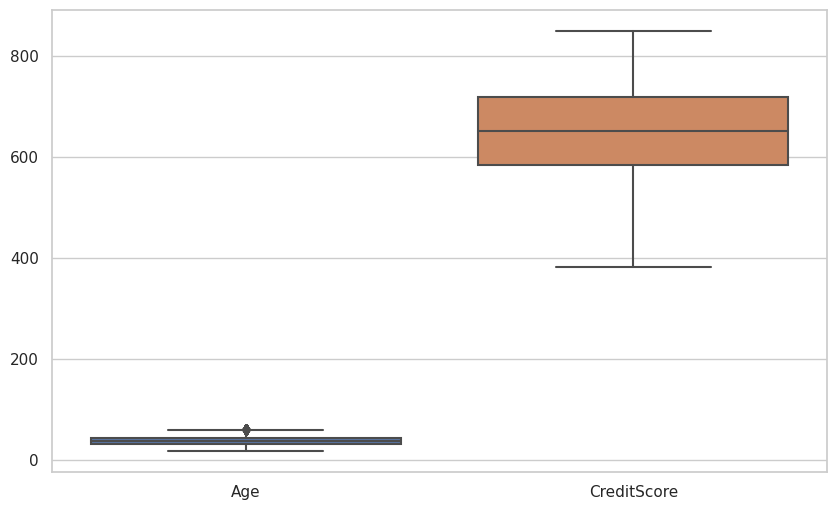

In [ ]:
train = df[["Age", "CreditScore"]]

def impute_outliers(data, column, factor):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - factor * iqr
    upper_bound = q3 + factor * iqr

    data_copy = data.copy()
    data_copy[column] = np.where(data_copy[column] < lower_bound, np.nan, data_copy[column])
    data_copy[column] = np.where(data_copy[column] > upper_bound, np.nan, data_copy[column])

    imputer = SimpleImputer(strategy="mean")
    data_imputed = imputer.fit_transform(data_copy[[column]])

    data[column] = data_imputed

    return data

for column in ["Age", "CreditScore"]:
    train = impute_outliers(train, column, 1.5)

plt.figure(figsize=(10, 6))
sns.boxplot(data=train)
plt.show()

# K-MEANS  CLUSTERING

In [ ]:
features_for_clustering = ['IsActiveMember','Point Earned','CreditScore']

X = df[features_for_clustering]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

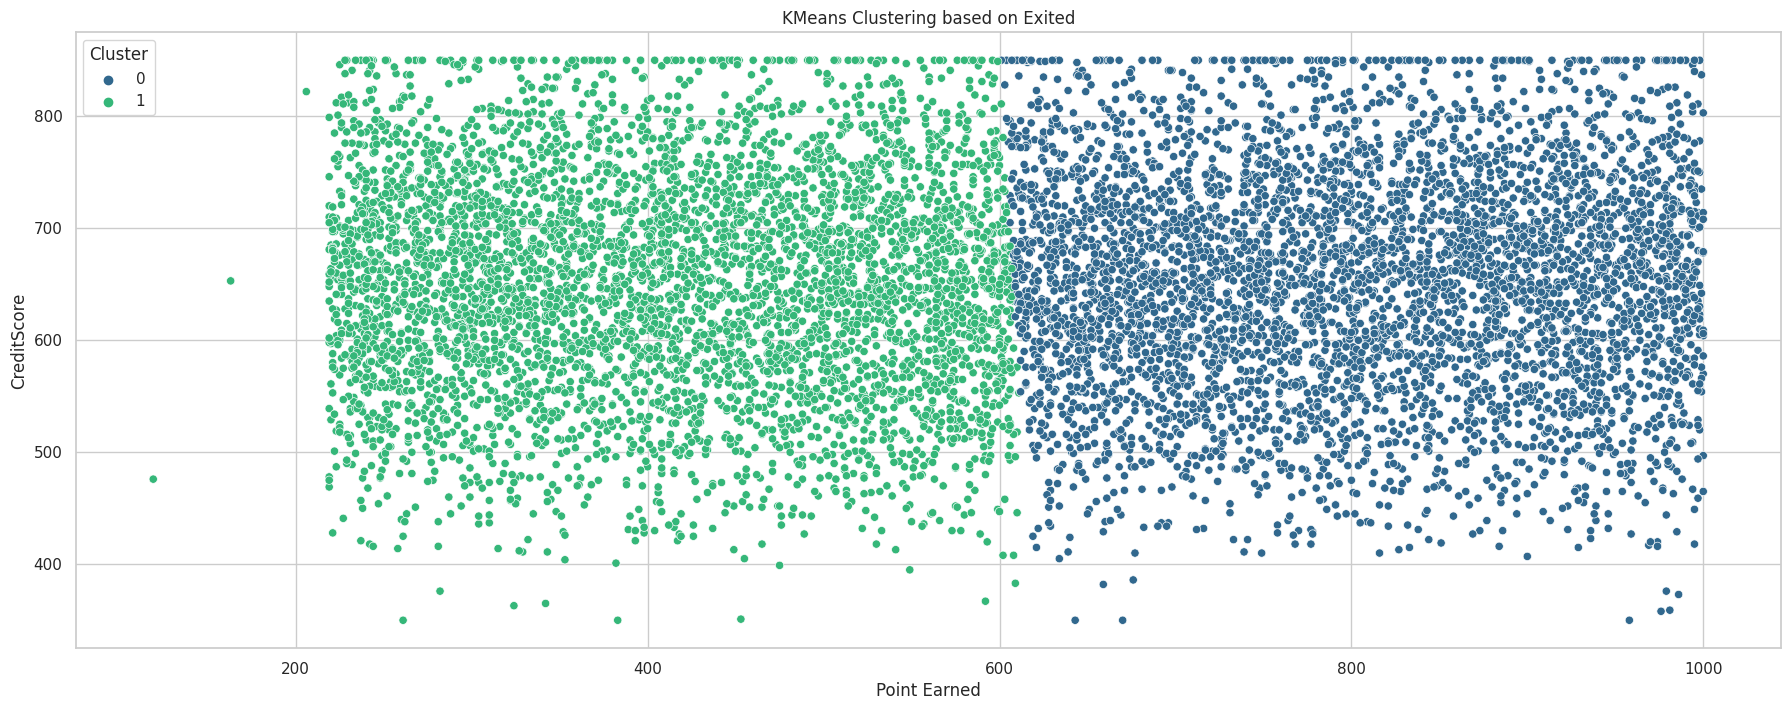

In [ ]:
plt.figure(figsize=(22, 8))
sns.scatterplot(data=df, x='Point Earned', y='CreditScore', hue='Cluster', palette='viridis')
plt.title('KMeans Clustering based on Exited')
plt.show()

In [ ]:
cluster_mean = df.groupby('Cluster')[['IsActiveMember','Point Earned', 'CreditScore']].mean()
print(cluster_mean)

         IsActiveMember  Point Earned  CreditScore
Cluster                                           
0              0.516025    803.311832   651.690183
1              0.514189    412.764636   649.385394


# LOGISTIC REGRESSION

In [ ]:
x = df.drop(columns='Exited')
y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

x_train_transformed = scaler.fit_transform(x_train)

x_test_transformed = scaler.transform(x_test)

In [ ]:
x.isnull().sum()

CustomerId            0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
Cluster               0
dtype: int64

In [ ]:
clf_lr = LogisticRegression(max_iter=1000)
clf_lr.fit(x_train_transformed, y_train)
y_pred_lr = clf_lr.predict(x_test_transformed)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy Logistic Regression:", accuracy_lr)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

conf_matrix = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy Logistic Regression: 0.999

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix:
[[1606    1]
 [   1  392]]


# DECISION TREE

In [ ]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(x_train_transformed, y_train)
y_pred_dt = clf_dt.predict(x_test_transformed)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy Decision Tree:", accuracy_dt)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix:")
print(conf_matrix_dt)

Accuracy Decision Tree: 0.9975

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       0.99      0.99      0.99       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Confusion Matrix:
[[1604    3]
 [   2  391]]


# ANN

In [ ]:
model = Sequential()

model.add(Dense(units=128, activation='relu', input_dim=x_train_transformed.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train_transformed, y_train, epochs=20, batch_size=32, validation_split=0.2)

y_pred_ann = (model.predict(x_test_transformed) > 0.5).astype("int32")


Epoch 1/20
200/200 [==============================] - 3s 8ms/step - loss: 0.0997 - accuracy: 0.9616 - val_loss: 0.0106 - val_accuracy: 0.9987
Epoch 2/20
200/200 [==============================] - 1s 7ms/step - loss: 0.0100 - accuracy: 0.9984 - val_loss: 0.0106 - val_accuracy: 0.9987
Epoch 3/20
200/200 [==============================] - 1s 7ms/step - loss: 0.0086 - accuracy: 0.9984 - val_loss: 0.0111 - val_accuracy: 0.9987
Epoch 4/20
200/200 [==============================] - 1s 6ms/step - loss: 0.0073 - accuracy: 0.9984 - val_loss: 0.0133 - val_accuracy: 0.9987
Epoch 5/20
200/200 [==============================] - 2s 10ms/step - loss: 0.0063 - accuracy: 0.9984 - val_loss: 0.0115 - val_accuracy: 0.9987
Epoch 6/20
200/200 [==============================] - 2s 12ms/step - loss: 0.0053 - accuracy: 0.9986 - val_loss: 0.0121 - val_accuracy: 0.9987
Epoch 7/20
200/200 [==============================] - 2s 12ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 0.0131 - val_accuracy: 0.9987
Epo

In [ ]:
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print(f'ANN Accuracy: {accuracy_ann}')

print('Classification Report:')
print(classification_report(y_test, y_pred_ann))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_ann))


ANN Accuracy: 0.9985
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      0.99      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
[[1606    1]
 [   2  391]]


In [ ]:
table = PrettyTable()
table.field_names = ["Model", "Accuracy"]
table.add_row(["Logistic Regression", accuracy_lr])
table.add_row(["Decision Tree", accuracy_dt])
table.add_row(["ANN", accuracy_ann])
print(table)

+---------------------+----------+
|        Model        | Accuracy |
+---------------------+----------+
| Logistic Regression |  0.999   |
|    Decision Tree    |  0.9975  |
|         ANN         |  0.9985  |
+---------------------+----------+
